In [ ]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [ ]:
df.columns = ['Sales']

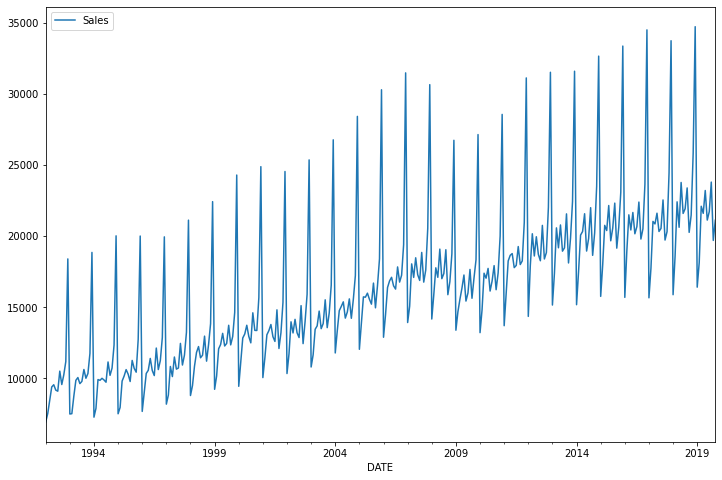

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
len(df)

334

In [ ]:
len(df)-18

316

In [ ]:
test_size = 18
test_ind = len(df) - test_size

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [ ]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [ ]:
X,y= generator[0]

In [ ]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [ ]:
y

array([[0.02047633]])

In [ ]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [ ]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

<ipython-input-39-95afb4e45afd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])


Epoch 1/20
304/304 [==============================] - 4s 8ms/step - loss: 0.0281 - val_loss: 0.0035
Epoch 2/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0156 - val_loss: 0.0119
Epoch 3/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0070 - val_loss: 0.0095


In [ ]:
losses = pd.DataFrame(model.history.history)

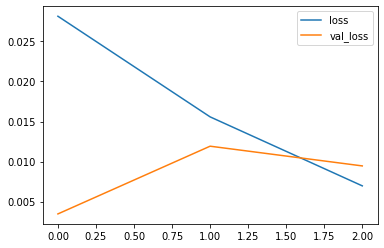

In [ ]:
losses.plot()

In [ ]:
import numpy as np

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):


   #get predictions 1 time ahead ([0] is for grabbing just the number not the array)
  current_pred = model.predict(current_batch)[0]

   # store predictions
  test_predictions.append(current_pred)
 
 #update batch to now include predictions and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
true_predictions  = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-48-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,23414.327271
2018-06-01,21589,22475.755022
2018-07-01,21919,22799.961311
2018-08-01,23381,24512.344672
2018-09-01,20260,22496.378690
2018-10-01,21473,23205.232307
2018-11-01,25831,27577.265987
2018-12-01,34706,36749.385270
2019-01-01,16410,20179.989635


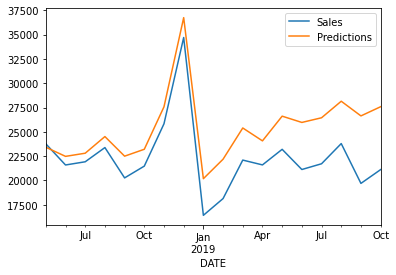

In [ ]:
test.plot()

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator,epochs=8)

Epoch 1/8


<ipython-input-54-ea9582cffe1b>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=8)


322/322 [==============================] - 4s 7ms/step - loss: 0.0249
Epoch 2/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0164
Epoch 3/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0085
Epoch 4/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0039
Epoch 5/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0026
Epoch 6/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0025
Epoch 7/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0020
Epoch 8/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0014


In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [ ]:
forecast

array([[26361.29867554],
       [37153.33137321],
       [16499.38321304],
       [18424.03093696],
       [22145.51365852],
       [21840.9804635 ],
       [23481.57829046],
       [21563.73972607],
       [22206.51945925],
       [24239.89784527],
       [20397.70789289],
       [21806.55624247]])

In [ ]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [ ]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

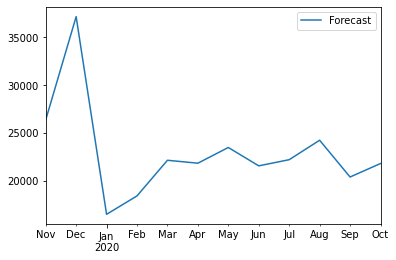

In [ ]:
forecast_df.plot()

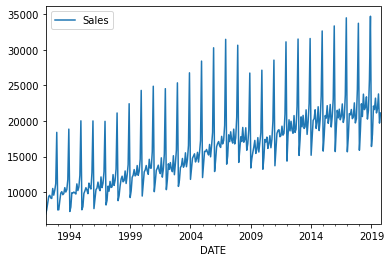

In [ ]:
df.plot()

(576.0, 611.0)

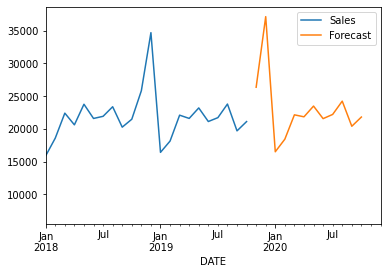

In [ ]:
ax = df.plot()  
forecast_df.plot(ax=ax) 
plt.xlim('2018-01-01','2020-12-01') 